<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKochbuch02_Generatoren/blob/main/02_Sinus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.utils import Sequence
import numpy as np
import math

Zu Übungszwecken bauen wir uns einen Generator, der Trainingsdaten für ein Modell bereitstellt, das Sinus-Werte berechnen soll. (Das Problem ist trivial, aber überschaubar!)

In [2]:
class DataGenerator(Sequence):

  def __init__(self, len=100, batch_size=10):
    self.len = len
    self.batch_size = batch_size

  def __len__(self):
    return self.len

  def __getitem__(self, index):
    if index >= self.len:
      raise IndexError("list index out of range")
    else:
      # batch_x ist ein Numpy-Array, gefüllt mit Zufallszahlen zwischen 0 und 2 Pi.
      # Die shape ist also schlichtweg (batch_size,)
      batch_x = np.random.uniform(0, math.pi*2, self.batch_size)
      batch_x = batch_x.astype("float32")
      # So einfach kann numpy die Sinus-Werte zu jedem einzelnen Element eines Arrays berechnen:
      batch_y = np.sin(batch_x)
      # Der Rückgabewert ist ein zweistelliges Tupel mit den Numpy-Arrays für x und y.
      return batch_x, batch_y

Hier bauen wir den Trainingsgenerator:

In [3]:
train_gen = DataGenerator()

Der erste Batch des Trainingsdaten-Generators:

In [4]:
print("train_gen[0]:", train_gen[0], "\n")

print("Der Batch ist ein Objekt vom Typ:", type(train_gen[0]), "\n")

x = train_gen[0][0]
print("Die Shape von x ist:", x.shape)

y = train_gen[0][1]
print("Die Shape von y ist:", y.shape)

train_gen[0]: (array([0.35382348, 0.14442462, 2.6942117 , 6.0973477 , 2.7403746 ,
       4.786617  , 4.2082386 , 6.1080704 , 0.9029279 , 5.161289  ],
      dtype=float32), array([ 0.34648696,  0.14392306,  0.4326057 , -0.18476975,  0.39053997,
       -0.9972464 , -0.8755852 , -0.1742213 ,  0.78514355, -0.9009249 ],
      dtype=float32)) 

Der Batch ist ein Objekt vom Typ: <class 'tuple'> 

Die Shape von x ist: (10,)
Die Shape von y ist: (10,)


Ein passendes Modell. Passend bedeutet hier erst einmal nur, dass die shapes von Eingang und Ausgang mit den Generator korrespondieren:

In [6]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer = Input(shape=(1,))

x = Dense(units=25, activation='tanh')(input_layer)

x = Dense(units=25, activation='tanh')(x)

output_layer = Dense(units=1, activation='tanh')(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                50        
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 726
Trainable params: 726
Non-trainable params: 0
_________________________________________________________________


Wie gehabt – Der Optimizer:

In [8]:
optimizer = Adam(learning_rate=0.0005)

def loss(y_true, y_pred):
  return K.mean(K.square(y_true - y_pred))

model.compile(loss=loss, optimizer=optimizer)

Der Clou ist, dass wir nunmehr statt eines Numpy Arrays den Generator an `model.fit()` übergeben. Daher müssen wir auch das Argument `batch_size` nicht mehr festlegen, denn dafür ist der Generator verantwortlich.

In [13]:
model.fit(train_gen, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 2/25
100/100 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 3/25
100/100 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 4/25
100/100 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 5/25
100/100 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 6/25
100/100 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 7/25
100/100 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 8/25
100/100 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 9/25
100/100 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 10/25
100/100 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 11/25
100/100 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 12/25
100/100 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 13/25
100/100 [====

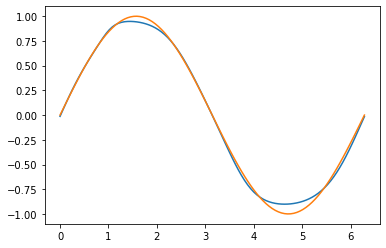

In [14]:
from matplotlib import pyplot as plt

x = np.linspace(0, math.pi*2, num=100)
y_predict = model.predict(x)
y_sin = np.sin(x)

plt.plot(x,y_predict)
plt.plot(x,y_sin)
plt.show()